# Part 1a - Real life examples

Let $X$ be the treatment variable and $Y$ be the outcome variable.

* **Confounder:** A variable that causes both the treatment and the outcome ($X \leftarrow Z \to Y$). If we don’t adjust for it, it leaves an open back-door path that induces a spurious correlation.
    * Example: We want to study if providing **unemployment insurance ($X$)** causes **unemployment duration ($Y$)** to increase. In this case, we must also take into account the **labor market tightness ($Z$)**. If the labor market is rigid, unemployment tends to last longer ($Y$), and also policymakers are more likely to give insurance ($X$). Thus, ($X \leftarrow Z \to Y$). If we didn't condition on the confounder $Z$, we could overestimate the effect of $X$ on $Y$.
---
* **Mediator:** A variable through which the treatment affects the outcome, as it "carries" the effect ($X \to Z \to Y$). If we condition on a mediator, we may block some/all of the effect of $X$ on $Y$.
    * Example: We want to quantify the effect of a hike in the **monetary policy rate ($X$)** on **economic activity ($Y$)**. Focusing on the credit channel, a higher **monetary policy rate ($X$)** reduces **credit ($Z$)**, which in turn hinders **economic activity ($Y$)**. Thus ($X \to Z \to Y$). Conditioning on the mediator $Z$ blocks the transmission of $X$ to $Y$.
---
* **Collider:** A variable that is caused both by the treatment and the outcome ($X \to Z \leftarrow Y$). It should be ignored, since conditioning on it generates an additional relation between $X$ and $Y$, resulting in bias.
    * Example: We are curious if a higher **police presence ($X$)** leads to lower **criminal activity ($Y$)**. We know that **arrests ($Z$)** are more likely when both **police presence ($X$)** and criminal activity **criminal activity ($Y$)** are high. Thus, ($X \to Z \leftarrow Y$). Conditioning on $Z$ induces selection bias, if I observe a high (low) number of arrests, this could be due to either a high (low) $Y$ or a low (high) $X$.

In [2]:
using Pkg
for pkg in ["CausalInference", "Graphs", "GraphRecipes", "Plots"]
    haskey(Pkg.dependencies(), pkg) || Pkg.add(pkg)
end

using CausalInference
using Graphs
using GraphRecipes
using Plots

using Pkg
for pkg in ["Random","Distributions","DataFrames","StatsModels","GLM","Plots"]
    haskey(Pkg.dependencies(), pkg) || Pkg.add(pkg)
end

using Random, Distributions, DataFrames, StatsModels, GLM, Plots

   Resolving package versions...
  No Changes to `C:\Users\buser\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\buser\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\buser\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\buser\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\buser\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\buser\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\buser\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\buser\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\buser\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\buser\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\buser\.julia\environments\v1.11\Project.toml`
 to `

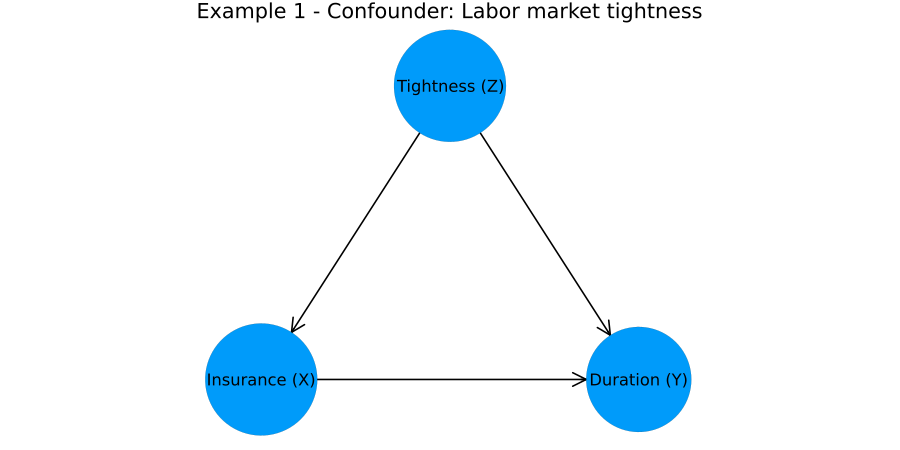

In [3]:
names1 = ["Tightness (Z)", "Insurance (X)", "Duration (Y)"]
idx1 = Dict(n => i for (i,n) in enumerate(names1))
E1 = [
    idx1["Tightness (Z)"]      => idx1["Insurance (X)"],
    idx1["Tightness (Z)"]   => idx1["Duration (Y)"],
    idx1["Insurance (X)"] => idx1["Duration (Y)"]
]
g1 = CausalInference.digraph(E1)
ex1 = graphplot(g1;
    names = names1,
    title = "Example 1 - Confounder: Labor market tightness",
    x = [0.50, 0.05, 0.95], y = [0.85, 0.15, 0.15],
    nodeshape = :circle,
    markerstrokecolor = :black,
    markerstrokewidth = 0.1,
    nodesize = 0.045,
    node_weights = ones(length(names1)),
    linecolor = :black,
    linewidth = 1.6,
    curvature_scalar = 0, 
    arrow = 0.65,
    fontsize = 11,
    size = (900, 450),
)
display(ex1)
savefig(ex1, "1a.example1_confounder.png");

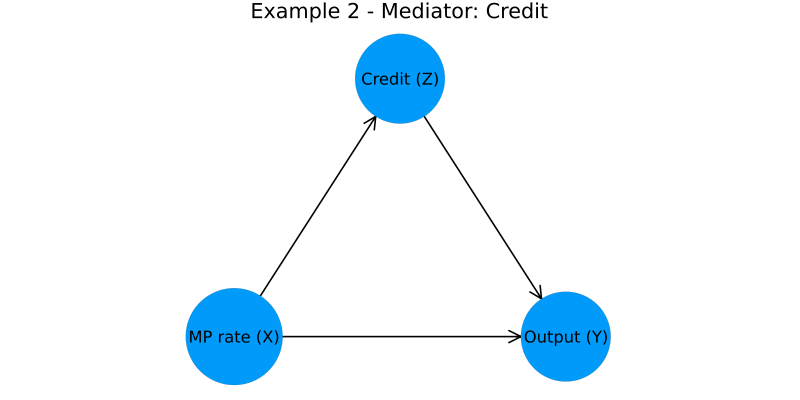

In [4]:
names2 = ["Credit (Z)", "MP rate (X)", "Output (Y)"]
idx2 = Dict(n => i for (i,n) in enumerate(names2))
E2 = [
    idx2["MP rate (X)"]      => idx2["Credit (Z)"],
    idx2["Credit (Z)"]   => idx2["Output (Y)"],
    idx2["MP rate (X)"]   => idx2["Output (Y)"]
]
g2 = CausalInference.digraph(E2)
ex2 = graphplot(g2;
    names = names2,
    title = "Example 2 - Mediator: Credit",
    x = [0.50, 0.05, 0.95], y = [0.85, 0.15, 0.15],
    nodeshape = :circle,
    markerstrokecolor = :black,
    markerstrokewidth = 0.1,
    nodesize = 0.045,
    node_weights = ones(length(names1)),
    linecolor = :black,
    linewidth = 1.6,
    curvature_scalar = 0, 
    arrow = 0.65,
    aspect_ratio = :equal, 
    fontsize = 11,
    size = (800, 400),
)
display(ex2)
savefig(ex2, "1a.example2_mediator.png");

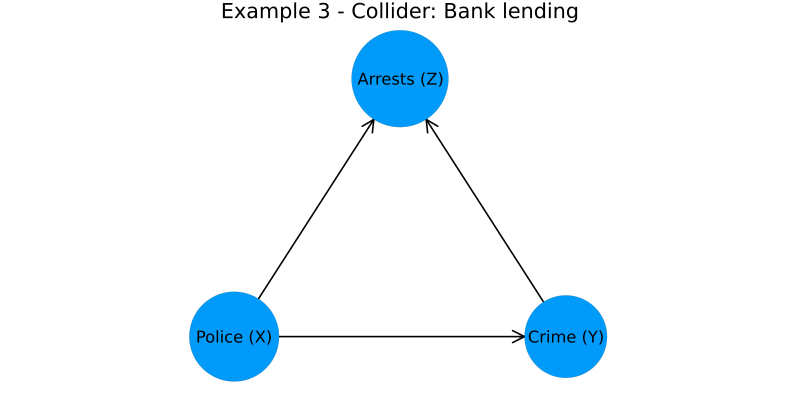

In [5]:
names3 = ["Arrests (Z)", "Police (X)", "Crime (Y)"]
idx3 = Dict(n => i for (i,n) in enumerate(names3))
E3 = [
    idx3["Police (X)"]      => idx3["Arrests (Z)"],
    idx3["Crime (Y)"]   => idx3["Arrests (Z)"],
    idx3["Police (X)"]   => idx3["Crime (Y)"],
]
g3 = CausalInference.digraph(E3)
ex3 = graphplot(g3;
    names = names3,
    title = "Example 3 - Collider: Bank lending",
    x = [0.50, 0.05, 0.95], y = [0.85, 0.15, 0.15],
    nodeshape = :circle,
    markerstrokecolor = :black,
    markerstrokewidth = 0.1,
    nodesize = 0.045,
    node_weights = ones(length(names1)),
    linecolor = :black,
    linewidth = 1.6,
    curvature_scalar = 0, 
    arrow = 0.65,
    aspect_ratio = :equal, 
    fontsize = 11,
    size = (800, 400), 
)
display(ex3)
savefig(ex3, "1a.example3_collider.png");

# Part 1b - Simpson's paradox
Simpson's paradox occurs when separated groups of data show the same relation, but after aggregating them, such relation dissapears or is reversed. This can be caused by other control variables which may affect the relation differently in each group.

In [7]:
Random.seed!(2810)
nA, nB = 500, 500

# Group A: Low X, High Y
xA = rand(Normal(5, 1), nA)
yA = 5 .+ xA .+ rand(Normal(0, 1), nA)

# Group B: High X, low Y
xB = rand(Normal(10, 1), nB)
yB = -5 .+ xB .+ rand(Normal(0, 1), nB)

dfA = DataFrame(group = fill("A", nA), x = xA, y = yA)
dfB = DataFrame(group = fill("B", nB), x = xB, y = yB)
df  = vcat(dfA, dfB)

mA = lm(@formula(y~1+x),dfA)
println("\n=== Group A ===")
println(mA)

mB = lm(@formula(y~1+x),dfB)
println("\n=== Group B ===")
println(mB)

m  = lm(@formula(y~1+x),df)
println("\n=== Aggregated ===")
println(m)


=== Group A ===
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
─────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  4.88892   0.230407   21.22    <1e-70   4.43623     5.34161
x            1.02604   0.0452178  22.69    <1e-78   0.937203    1.11489
───────────────────────────────────────────────────────────────────────

=== Group B ===
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
─────────────────────────────────────────────────────────────────────────
                Coef.  Std. Er

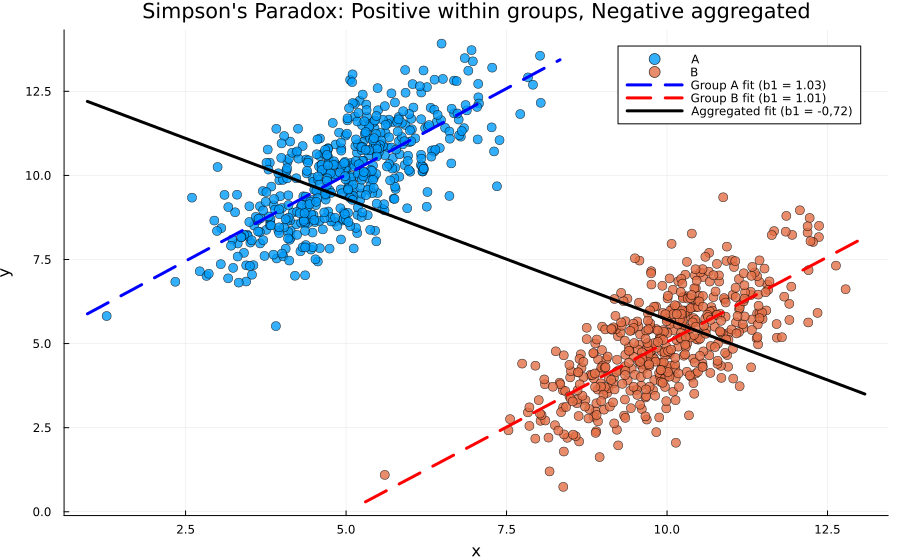

In [8]:
b0A, b1A = coef(mA)
b0B, b1B = coef(mB)
b0, b1 = coef(m)

plt = scatter(df.x, df.y;
    group = df.group,
    markersize = 5,
    markerstrokewidth = 0.5,
    markerstrokecolor = :black,
    alpha = 0.8,
    xlabel = "x",
    ylabel = "y",
    title = "Simpson's Paradox: Positive within groups, Negative aggregated",
    size = (900, 560)
)

xAgrid = range(minimum(dfA.x)-0.3, maximum(dfA.x)+0.3, length=100)
xBgrid = range(minimum(dfB.x)-0.3, maximum(dfB.x)+0.3, length=100)
xgrid = range(minimum(df.x)-0.3,  maximum(df.x)+0.3,  length=100)

yAhat = b0A .+ b1A .* xAgrid
yBhat = b0B .+ b1B .* xBgrid
yhat = b0 .+ b1 .* xgrid

# Draw the three lines (choose distinct styles)
plot!(plt, xAgrid, yAhat; color=:blue,  linewidth=3, linestyle=:dash, label="Group A fit (b1 = 1.03)")
plot!(plt, xBgrid, yBhat; color=:red,   linewidth=3, linestyle=:dash, label="Group B fit (b1 = 1.01)")
plot!(plt, xgrid, yhat; color=:black, linewidth=3, label="Aggregated fit (b1 = -0,72)")

display(plt)
savefig(plt, "1b.simpson_paradox.png");

# Part 2 - Can we omit some controls?

## Data

- $Y = X + Z_1 + Z_2 + Z_3 + \varepsilon_Y$
- $X = Z_1 + Z_2 + \varepsilon_X$
- $Z_1 = \varepsilon_{Z_1}$
- $Z_2 = Z_3 + \varepsilon_{Z_2}$
- $Z_3 = \varepsilon_{Z_3}$

In [52]:
n = 10000

e_y = randn(n)
e_x = randn(n)
e_z1 = randn(n)
e_z2 = randn(n)
e_z3 = randn(n)

z3 = e_z3
z2 = z3 .+ e_z2
z1 = e_z1
x = z1 .+ z2 .+ e_x
y = x .+ z1 .+ z2 .+ z3 .+ e_y

df = DataFrame(y = y, x = x, z1 = z1, z2 = z2, z3 = z3);

## DAG

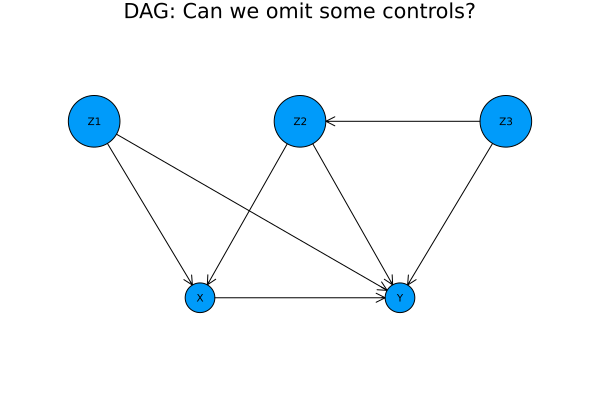

In [13]:
names = ["Z1","Z2","Z3","X","Y"]
idx = Dict(n => i for (i,n) in enumerate(names))

E = [
    idx["X"]  => idx["Y"],
    idx["Z1"] => idx["X"],  idx["Z1"] => idx["Y"],
    idx["Z2"] => idx["X"],  idx["Z2"] => idx["Y"],
    idx["Z3"] => idx["Z2"], idx["Z3"] => idx["Y"]
]

g = CausalInference.digraph(E)
dag1 = graphplot(g; names = names,
    nodeshape = :circle,
    title = "DAG: Can we omit some controls?",
    x = [0.15, 0.50, 0.85, 0.33, 0.67], y = [0.80, 0.80, 0.80, 0.50, 0.50],
    curvature_scalar = 0,
    arrow = 0.65)
display(dag1)
savefig(dag1, "2.dag.png");

## Estimation

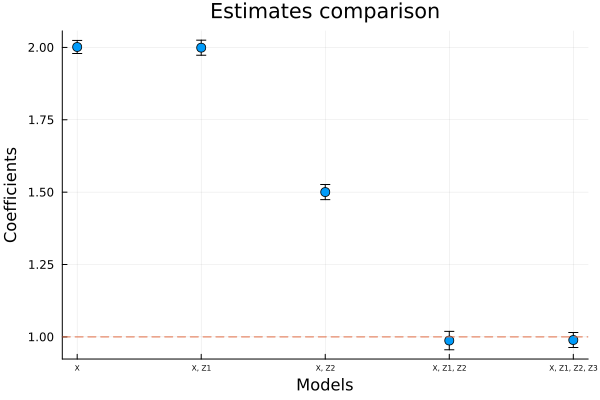

In [54]:
specif = [
    @formula(y ~ x),
    @formula(y ~ x + z1),
    @formula(y ~ x + z2),
    @formula(y ~ x + z1 + z2),
    @formula(y ~ x + z1 + z2 + z3)
]

models = [lm(s, df) for s in specif]

tcalc = quantile(TDist(dof_residual(m)), 0.995)
coefs  = [coef(m)[2] for m in models]
std = [stderror(m)[2] for m in models]
lowint = coefs .- tcalc .* std
highint = coefs .+ tcalc .* std

labels = ["X", "X, Z1", "X, Z2", "X, Z1, Z2", "X, Z1, Z2, Z3"]
comp = plot(1:5, coefs; yerror=(coefs .- lowint, highint - coefs),
    title="Estimates comparison",
    seriestype=:scatter,
    xlabel="Models",
    ylabel="Coefficients",
    markersize=5,
    xticks=(1:5, labels),
    xtickfont=font(5),
    legend=false)
hline!([1], ls=:dash)
display(comp)
savefig(comp, "2.estimates_comparison.png");

- Which regressions seem to estimate the effect correctly?

Models 4 ($Y \sim X, Z_1, Z_2$) and 5 ($Y \sim X, Z_1, Z_2, Z_3$) provide unbiased estimators for the true effect of $X$ on $Y$. The other models' coefficients are biased upwards because they omit confounders $Z1$ and $Z2$, which cause both $X$ and $Y$, thus leaving backdoor paths open.

- Print a summary table for regressions (4) and (5). What can you comment on the point estimate and precision?

The point estimates between models 4 and 5 are statistically indistinguishable from the true effect (0.99 and 0.99 vs. 1.00). The standard error is slightly lower for model 5 (0.010 vs. 0.12). Interestingly, the coefficient for $Z_2$ in model 4 is biased (1.49 vs. 1.00) because we omit $Z_3$, which is a confounder of both and leave a backdoor path open. However, since we are only interested in the effect of $X$, this is not a problem.

- Can you ignore some $Z \in \{Z_1, Z_2, Z_3\}$ and get a good estimate? Why do you think that is? 

Indeed, as model 4 suggests, we can omit $Z_3$ and still get a good estimate for $X$. This is because $Z_3$ causes $Y$ but it doesn't directly cause $X$, only through $Z_2$. The backboor path would look like $X \leftarrow Z_2 \leftarrow Z_3 \to Y$, and we can close it if we control by $Z_2$. Thus, including $Z_1$ and $Z_2$ is enough for obtaining a good estimate.

In [56]:
println("\n=== Model 4 ===")
println(models[4])
println("\n=== Model 5 ===")
println(models[5])


=== Model 4 ===
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

y ~ 1 + x + z1 + z2

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       t  Pr(>|t|)   Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.00024185   0.0123667   -0.02    0.9844  -0.0244831  0.0239994
x             0.987308     0.012311    80.20    <1e-99   0.963176   1.01144
z1            1.03189      0.0174887   59.00    <1e-99   0.997607   1.06617
z2            1.51318      0.015042   100.60    <1e-99   1.4837     1.54267
─────────────────────────────────────────────────────────────────────────────

=== Model 5 ===
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.Chole

# Part 3 - Damned if you do, damned if you don't

## VERSION 1 ($Z \rightarrow Y$, $Z \nrightarrow X$)

### Data

- $Y = X + Z + U_2 + \varepsilon_Y$
- $X = U_1 + \varepsilon_X$
- $Z = U_1 + U_2 + \varepsilon_{Z}$
- $U_1 = \varepsilon_{U_1}$
- $U_2 = \varepsilon_{U_2}$

In [58]:
n = 10000

e_y = randn(n)
e_x = randn(n)
e_z = randn(n)
e_u1 = randn(n)
e_u2 = randn(n)

u1 = e_u1
u2 = e_u2
z = u1 .+ u2 + e_z
x = u1 .+ e_x
y = x .+ z .+ u2 .+ e_y

df = DataFrame(y = y, x = x, z = z, u1 = u1, u2 = u2);

### DAG

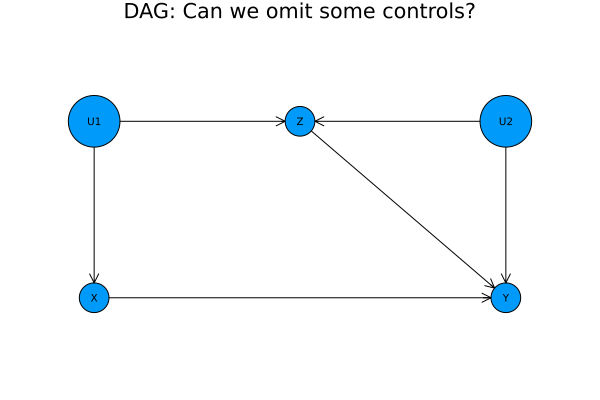

In [60]:
names = ["U1","Z","U2","X","Y"]
idx = Dict(n => i for (i,n) in enumerate(names))

E = [
    idx["X"]  => idx["Y"],
    idx["U1"] => idx["X"],  idx["U1"] => idx["Z"],
    idx["Z"] => idx["Y"],
    idx["U2"] => idx["Z"], idx["U2"] => idx["Y"]
]

g = CausalInference.digraph(E)
dag21 = graphplot(g; names = names,
    nodeshape = :circle,
    title = "DAG: Can we omit some controls?",
    x = [0.15, 0.50, 0.85, 0.15, 0.85], y = [0.80, 0.80, 0.80, 0.50, 0.50],
    curvature_scalar = 0,
    arrow = 0.65)
display(dag21)
savefig(dag21, "3.dag1.png");

### Estimates

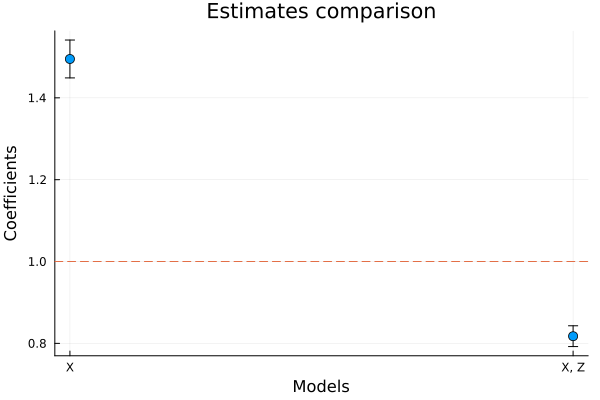

In [62]:
specif2 = [
    @formula(y ~ x),
    @formula(y ~ x + z),
]

models2 = [lm(s, df) for s in specif2]

tcalc = quantile(TDist(dof_residual(m)), 0.995)
coefs2  = [coef(m)[2] for m in models2]
std2 = [stderror(m)[2] for m in models2]
lowint2 = coefs2 .- tcalc .* std2
highint2 = coefs2 .+ tcalc .* std2

labels = ["X", "X, Z"]
comp2 = plot(1:2, coefs2; yerror=(coefs2 .- lowint2, highint2 - coefs2),
    title="Estimates comparison",
    seriestype=:scatter,
    xlabel="Models",
    ylabel="Coefficients",
    markersize=5,
    xticks=(1:5, labels),
    legend=false)
hline!([1], ls=:dash)
display(comp2)
savefig(comp2, "3.estimates_comparison.png");


**2 BACKDOOR PATHS**

- $Z$ Mediator ($U_1$): $X \leftarrow U_1 \to Z \to Y$
- $Z$ Collider: $X \leftarrow U_1 \to Z \leftarrow U_2 \to Y$

Including $Z$ blocks the effect of the unobservable confounder $U_1$ (acts as mediator of $U_1$), thus closing the first backdoor path. However, this opens the second one (induces additional correlation between $X$ and $Y$ due to its role as collider).

## VERSION 2 ($Z \to Y$, $Z \to X$)

### Data

- $Y = X + Z + U_2 + \varepsilon_Y$
- $X = U_1 + \varepsilon_X$
- $Z = U_1 + U_2 + \varepsilon_{Z}$
- $U_1 = \varepsilon_{U_1}$
- $U_2 = \varepsilon_{U_2}$

In [70]:
n = 10000

e_y = randn(n)
e_x = randn(n)
e_z = randn(n)
e_u1 = randn(n)
e_u2 = randn(n)

u1 = e_u1
u2 = e_u2
z = u1 .+ u2 + e_z
x = u1 .+ z .+ e_x
y = x .+ z .+ u2 .+ e_y

df = DataFrame(y = y, x = x, z = z, u1 = u1, u2 = u2);

### DAG

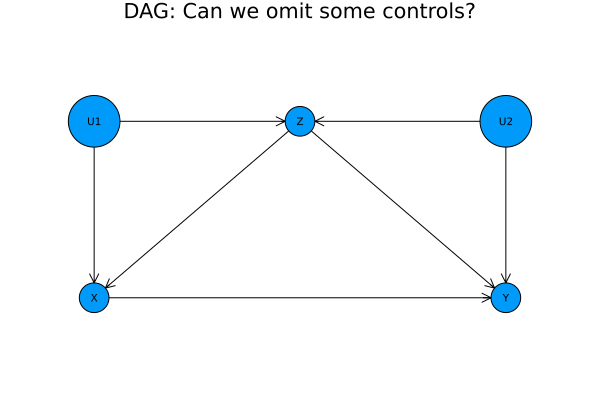

In [72]:
names = ["U1","Z","U2","X","Y"]
idx = Dict(n => i for (i,n) in enumerate(names))

E = [
    idx["X"]  => idx["Y"],
    idx["U1"] => idx["X"],  idx["U1"] => idx["Z"],
    idx["Z"] => idx["Y"], idx["Z"] => idx["X"],
    idx["U2"] => idx["Z"], idx["U2"] => idx["Y"]
]

g = CausalInference.digraph(E)
dag22 = graphplot(g; names = names,
    nodeshape = :circle,
    title = "DAG: Can we omit some controls?",
    x = [0.15, 0.50, 0.85, 0.15, 0.85], y = [0.80, 0.80, 0.80, 0.50, 0.50],
    curvature_scalar = 0,
    arrow = 0.65)
display(dag22)
savefig(dag22, "3.dag2.png");

### Estimates

In [84]:
specif3 = [
    @formula(y ~ x),
    @formula(y ~ x + z),
    @formula(y ~ x + u1),
    @formula(y ~ x + u2),
    @formula(y ~ x + z + u1),
    @formula(y ~ x + z + u2),
    @formula(y ~ x + u1 + u2),
    @formula(y ~ x + z + u1 + u2)
]

models3 = [lm(s, df) for s in specif3]

coefs3  = [coef(m)[2] for m in models3]
std3 = [stderror(m)[2] for m in models3]
lowint3 = coefs3 .- tcalc .* std3
highint3 = coefs3 .+ tcalc .* std3

labels = ["Only X","{Z}","{U1}","{U2}","{Z,U1}","{Z,U2}","{U1,U2}","{Z,U1,U2}"]
estimates = DataFrame(Controls = labels,
                 coefs3 = round.(coefs3, digits=4),
                 std3   = round.(std3,   digits=4))
show(estimates, allrows=true, allcols=true)

8×3 DataFrame
 Row │ Controls   coefs3   std3    
     │ String     Float64  Float64 
─────┼─────────────────────────────
   1 │ Only X      1.7159   0.0071
   2 │ {Z}         0.7941   0.01
   3 │ {U1}        2.0008   0.0102
   4 │ {U2}        1.5035   0.005
   5 │ {Z,U1}      0.9953   0.0124
   6 │ {Z,U2}      1.0061   0.0083
   7 │ {U1,U2}     1.4985   0.0087
   8 │ {Z,U1,U2}   1.005    0.0101

In [106]:
using Printf

isdir("output") || mkpath("output")

io = IOBuffer()
println(io, "\\begin{tabular}{lrr}")
println(io, "\\toprule")
println(io, "Controls & \$\\beta\$ & SE\\\\")
println(io, "\\midrule")
for i in 1:length(labels)
    @printf(io, "%s & %.4f & %.4f \\\\\n", labels[i], coefs3[i], std3[i])
end
println(io, "\\bottomrule")
println(io, "\\end{tabular}")
latex_tbl = String(take!(io))

open("output/3.estimates_table.tex","w") do f
    write(f, latex_tbl)
end

using Printf

isdir("output") || mkpath("output")

open("output/3.estimates_table.md","w") do io
    println(io, "Results for all specifications")
    println(io, "| Controls | \$\\beta\$ | SE |")
    println(io, "|:--|--:|--:|")
    for i in 1:length(labels)
        ctrl = replace(labels[i], "_" => "\\_")
        @printf(io, "| %s | %.4f | %.4f |\n", ctrl, coefs3[i], std3[i])
    end
end

**4 BACKDOOR PATHS**

- $Z$ Confounder: $X \leftarrow Z \to Y$
- $Z$ Mediator ($U_1$): $X \leftarrow U_1 \to Z \to Y$
- $Z$ Mediator ($U_2$): $X \leftarrow Z \leftarrow U_2 \to Y$
- $Z$ Collider: $X \leftarrow U_1 \to Z \leftarrow U_2 \to Y$

- Based on your findings, in what way(s) can you get a good estimate of the causal effect?
  
The models which included $Z$ and either $U_1$, $U_2$ or both provided a good estimate of the true effect (0.0995, 1.006, 1.005 vs. 1.000). Specifically, models 5, 6 and 8 achieve a good estimator. Standard errors are very close, but its slightly lower in the models that include just one of the two unobservable controls (0.008, 0.008 vs. 0.010).

- What is the minimal sufficient set of controls to get a good estimate?

The minimal set of controls are $Z$ and **just one** of the two unobservable controls ($U_1$ or $U_2$).

- Provide intuition on why you can get good estimates controlling for the variables you stablished above.

Given that now $Z$ is a confounder, there's a total of 4 backdoor paths in this system. Fortunately, controlling by $Z$ closes the first three, as it clearly closes its own and also blocks the effect of the other confounders $U_1$ & $U_2$, since its a mediator of both. However, we still have the backdoor path where $Z$ acts as a collider, and including it creates spurious correlation. Here, either $U_1$ or $U_2$ are useful. Since they are the confounders for the relation of $Z$ and $X$, or the relation of $Z$ and $Y$, controlling by one of them blocks the relation ($Z \leftarrow U_1 \to X$) or ($Z \leftarrow U_2 \to Y$), closing the collider backdoor path at the same time! In practice though, this is very difficult since we have been working with the assumption of of both $U_1$ and $U_2$ being observable, when usually they are not.